In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data=pd.read_excel('/content/Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
data.dropna(axis=0,inplace=True)
data.shape

(10682, 11)

In [8]:
data['Price']=data['Price'].apply(lambda x: float(x))

Text(0.5, 1.0, 'Price Distribution')

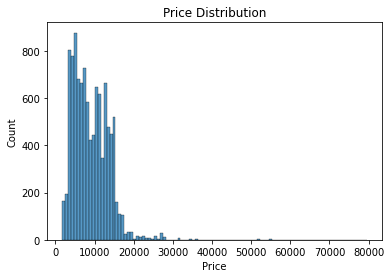

In [9]:
sns.histplot(x='Price',bins=103,data=data)
plt.title('Price Distribution')

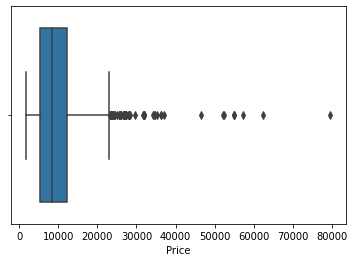

In [10]:
sns.boxplot(x='Price',data=data)

In [11]:
data.Price.describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [12]:
data['Price'].skew()

1.812404554693161

The peak of the distribution is in left side that means our data is positively skewed and most of the tickets is being sold at the price less than the average and it shows the presence of outliers on the right of the graph which means that there is very expensive flight tickets comparing to the majority.  

In [13]:
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<Upper_Fence])
    return u

In [14]:
iqr_fence(data['Price'])

23001.0

The maximum value of a flight ticket is 23001 and prices above this value are all outliers. So we have to know the causes of these outliers.

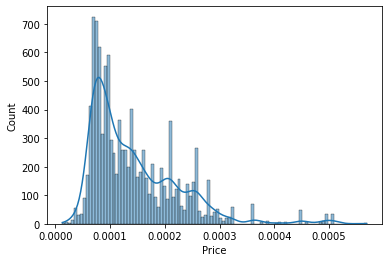

In [15]:
exp_price=1/data['Price']
sns.histplot(exp_price,bins=103,kde=True) 

Text(0.5, 1.0, 'Distribution of square Transformation of Price')

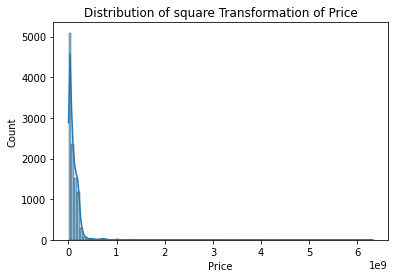

In [16]:
pow_price=data['Price']**2
sns.histplot(pow_price,bins=103,kde=True)
plt.title('Distribution of square Transformation of Price')

Text(0.5, 1.0, 'Distribution of Log Transformation of Price')

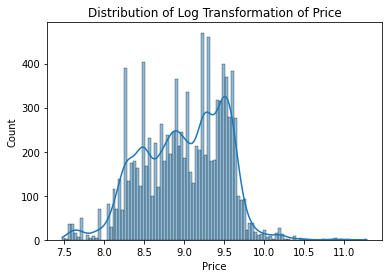

In [17]:
Log_price=np.log(data['Price'])
sns.histplot(Log_price,bins=103,kde=True,)
plt.title('Distribution of Log Transformation of Price')

The transformation of the values of Price variable into its logarithm is the closest one to normal distribution

In [18]:
data['Log_price']=Log_price

Text(0.5, 1.0, 'Airline Distribution')

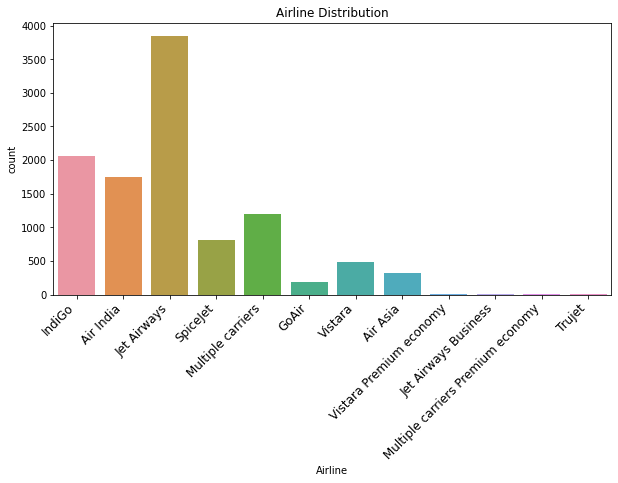

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Airline',data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('Airline Distribution')

In [20]:
data.Airline.value_counts(normalize=True)

Jet Airways                          0.360326
IndiGo                               0.192192
Air India                            0.163921
Multiple carriers                    0.111964
SpiceJet                             0.076577
Vistara                              0.044842
Air Asia                             0.029863
GoAir                                0.018161
Multiple carriers Premium economy    0.001217
Jet Airways Business                 0.000562
Vistara Premium economy              0.000281
Trujet                               0.000094
Name: Airline, dtype: float64

Jet Airways has the highest number of flights. It's the most wanted airline company by passengers.

Text(0.5, 1.0, 'Price vs Airline')

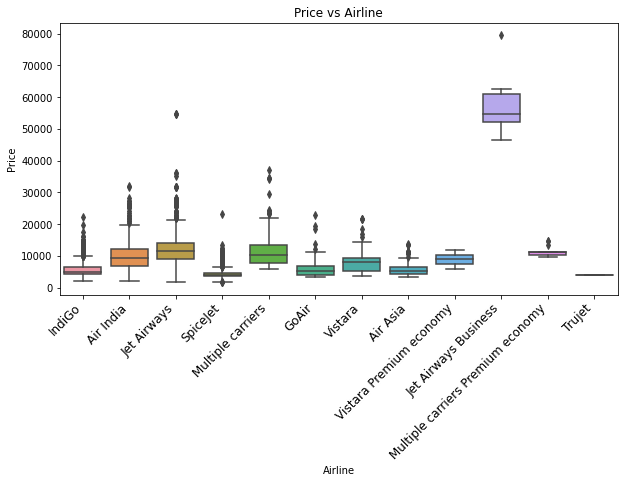

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Airline',y='Price',data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('Price vs Airline')

In [22]:
data[data['Airline']=='Jet Airways Business'].describe()

,Price,Log_price
count,6.000000,6.000000
mean,58358.666667,10.959122
std,11667.596748,0.187243
min,46490.000000,10.746993
25%,52243.000000,10.863661
50%,54747.000000,10.909466
75%,61122.500000,11.019931
max,79512.000000,11.283663


The graph shows that approximately all the Airline companies have the same price range between 1759 and 20000 except Jet Airways Business which its minimum price ticket is 46490 which is expected because it's for businessmen

Text(0.5, 1.0, 'Source Distribution')

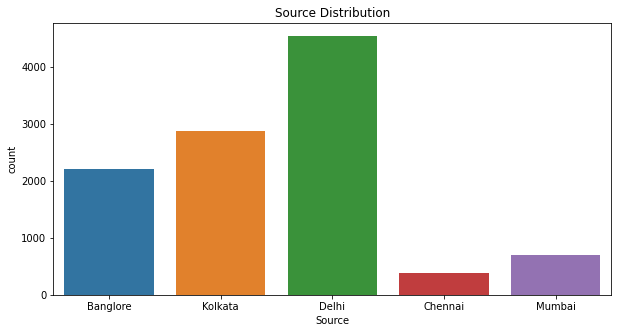

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='Source',data=data)
plt.title('Source Distribution')

In [24]:
data.Source.value_counts(normalize=True)

Delhi       0.424640
Kolkata     0.268770
Banglore    0.205673
Mumbai      0.065250
Chennai     0.035667
Name: Source, dtype: float64

42,5% of journeys departs from Delhi followed by Kolkata (2nd place) and Banglore(3rd place). It's expected because Delhi is the capital of India 

Text(0.5, 1.0, 'Price vs Source')

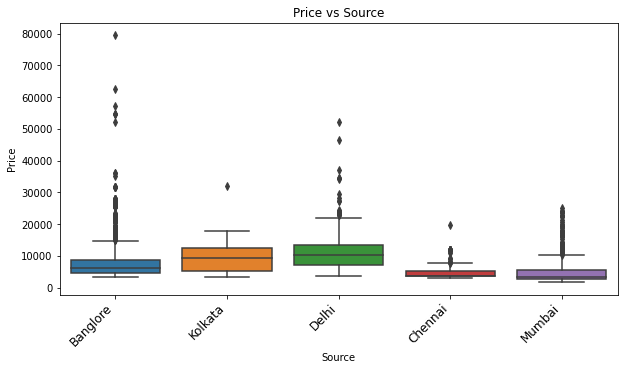

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Source',y='Price',data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('Price vs Source')

Text(0.5, 1.0, 'Destination Distribution')

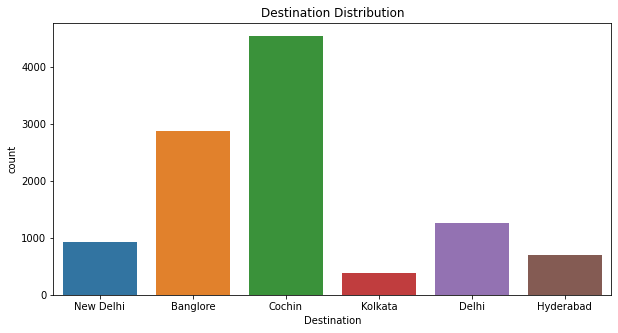

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Destination',data=data)
plt.title('Destination Distribution')

New Delhi is in Delhi so we will replace it with Delhi

Text(0.5, 1.0, 'Destination Distribution')

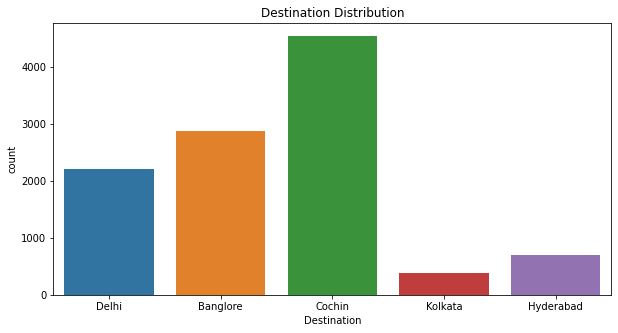

In [27]:
data['Destination']=data['Destination'].replace('New Delhi','Delhi')
plt.figure(figsize=(10,5))
sns.countplot(x='Destination',data=data)
plt.title('Destination Distribution')

Text(0.5, 1.0, 'Distribution of total number of Stops')

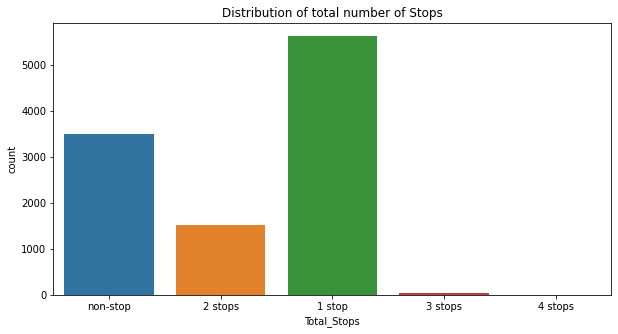

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Total_Stops',data=data)
plt.title('Distribution of total number of Stops')

In [29]:
data.Total_Stops.value_counts(normalize=True)

1 stop      0.526587
non-stop    0.326811
2 stops     0.142295
3 stops     0.004213
4 stops     0.000094
Name: Total_Stops, dtype: float64

In [30]:
data['Total_Stops'].replace({'non-stop': 0 ,'1 stop':1 ,'2 stops':2 ,'3 stops':3 ,'4 stops':4},inplace=True)

Text(0.5, 1.0, 'Total_Stops vs Price')

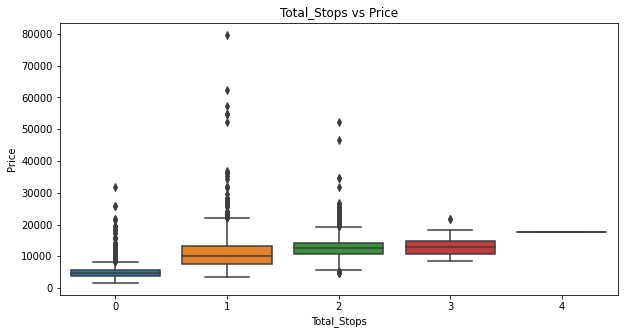

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops',y='Price',data=data)
plt.title('Total_Stops vs Price')

As expected, Journeys with 0 stops are the cheapest.

Text(0.5, 1.0, 'Distribution of Additional Info')

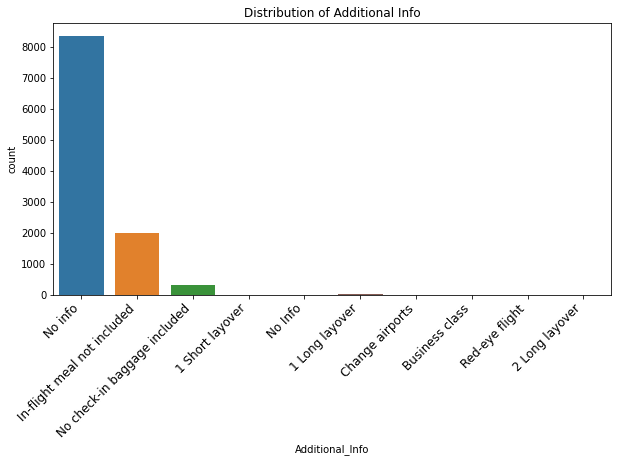

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Additional_Info',data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('Distribution of Additional Info')

In [33]:
data['Additional_Info']=data['Additional_Info'].replace('No Info','No info')

Text(0.5, 1.0, 'Price vs Additional_Info')

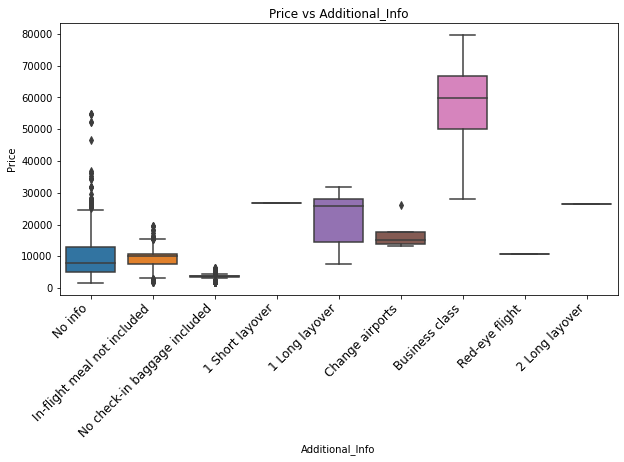

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Additional_Info',y='Price',data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('Price vs Additional_Info')

The additional Info is important for predicting the price.

In [35]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Date_of_Journey'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                   10682
unique                     40
top       2019-05-18 00:00:00
freq                      504
first     2019-01-03 00:00:00
last      2019-12-06 00:00:00
Name: Date_of_Journey, dtype: object

All of the journeys were in the same year (2019) so the year is not needed in our case

In [36]:
data["Day_of_Journey"] = data["Date_of_Journey"].dt.day
data["Month_of_Journey"] = data["Date_of_Journey"].dt.month

In [37]:
data['Dep_Time_Hour'] = pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_Time_Min'] = pd.to_datetime(data.Dep_Time).dt.minute
data['Arr_Time_Hour'] = pd.to_datetime(data.Arrival_Time).dt.hour
data['Arr_Time_Min'] = pd.to_datetime(data.Arrival_Time).dt.minute

We have to make sure if the Dep_Time and Arrival_Time has seconds

In [38]:
print((pd.to_datetime(data.Dep_Time).dt.second).unique())
print((pd.to_datetime(data.Arrival_Time).dt.second).unique())

[0]
[0]




*   Both has only hours and minutes
*   Now we have to clean the Duration column : we can't convert it to datetime type because it contains letters h (for hours) and m (for minutes).



In [39]:
duration = list(data["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

In [40]:
dur_minutes=[]
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
data.drop(['Duration'],axis=1,inplace=True)
data['Duration']=dur_minutes

In [41]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Log_price,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Min,Arr_Time_Hour,Arr_Time_Min,Duration
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897.0,8.267962,24,3,22,20,1,10,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662.0,8.944028,5,1,5,50,13,15,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882.0,9.538348,6,9,9,25,4,25,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218.0,8.735204,5,12,18,5,23,30,325
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302.0,9.495670,3,1,16,50,21,35,285


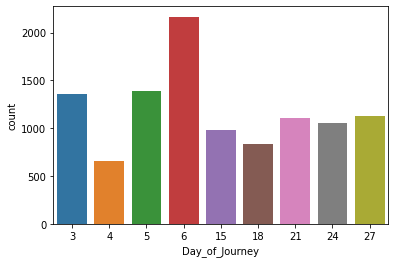

In [42]:
sns.countplot(x='Day_of_Journey',data=data)

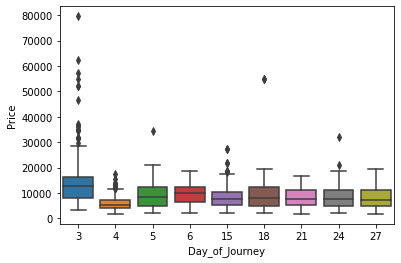

In [43]:
sns.boxplot(x='Day_of_Journey',y='Price',data=data)

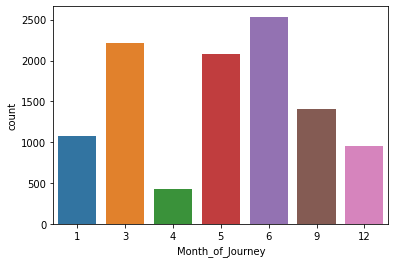

In [44]:
sns.countplot(x='Month_of_Journey',data=data)

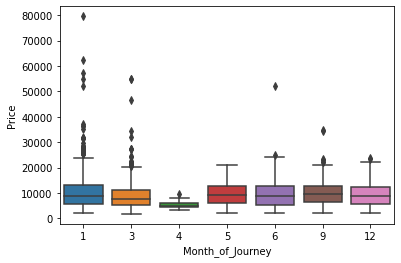

In [45]:
sns.boxplot(x='Month_of_Journey',y='Price',data=data)

As the graph shows April is the month with the cheapest flight tickets

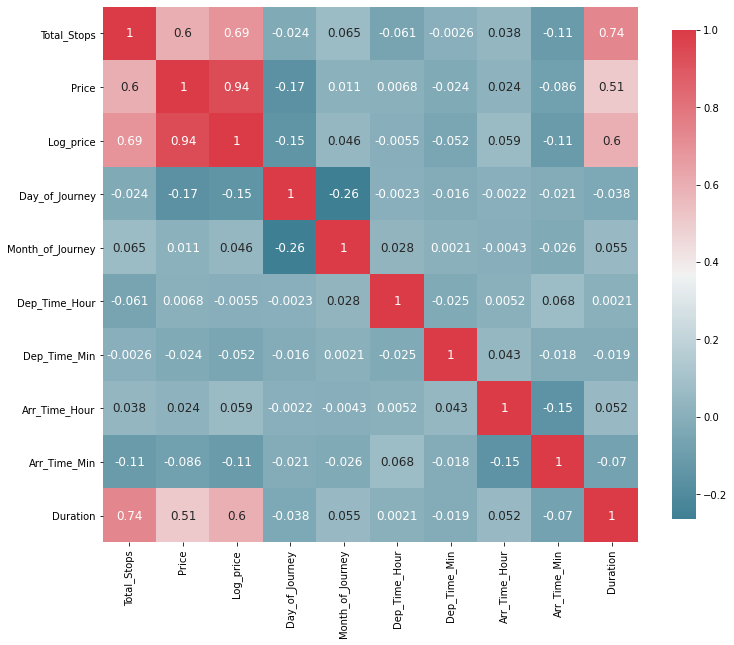

In [46]:
#Find correlation between Independent(X) and dependent attributes(y)
corr = data.corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={ 'shrink' : .9 }, 
    ax=ax, 
    annot = True, 
    annot_kws = { 'fontsize' : 12 } )

In [47]:
#Feature Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Additional_Info"] = le.fit_transform(data["Additional_Info"])
data["Airline"] = le.fit_transform(data["Airline"])
data["Destination"] = le.fit_transform(data["Destination"])
data["Source"] = le.fit_transform(data["Source"])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10682 non-null  int64         
 1   Date_of_Journey   10682 non-null  datetime64[ns]
 2   Source            10682 non-null  int64         
 3   Destination       10682 non-null  int64         
 4   Route             10682 non-null  object        
 5   Dep_Time          10682 non-null  object        
 6   Arrival_Time      10682 non-null  object        
 7   Total_Stops       10682 non-null  int64         
 8   Additional_Info   10682 non-null  int64         
 9   Price             10682 non-null  float64       
 10  Log_price         10682 non-null  float64       
 11  Day_of_Journey    10682 non-null  int64         
 12  Month_of_Journey  10682 non-null  int64         
 13  Dep_Time_Hour     10682 non-null  int64         
 14  Dep_Time_Min      1068

In [49]:
X=data[['Airline','Source','Destination','Total_Stops','Additional_Info','Day_of_Journey','Month_of_Journey','Dep_Time_Hour','Dep_Time_Min','Arr_Time_Hour','Arr_Time_Min','Duration']]
y=data.loc[:,'Log_price']

In [50]:
# Important feature using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection =ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

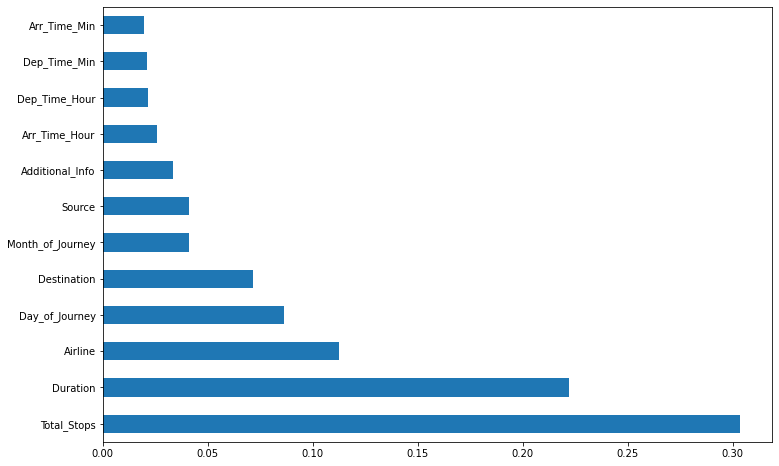

In [51]:
# plot graph of important feature for better visualization

plt.figure(figsize =(12,8))
feat_importances =pd.Series(selection.feature_importances_,index =X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

The most important features is the total number of stops, duration of the journey and the airline.

In [52]:
#Splitting data to training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,y,test_size = 0.25, random_state = 42)

In [53]:
from sklearn.model_selection import KFold,cross_val_score
models = []
models.append(('Multiple Linear Regression ', LinearRegression()))
models.append(('Decision Tree ', DecisionTreeRegressor()))
models.append(('RandomForest ', RandomForestRegressor()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train,scoring='neg_mean_squared_error', cv=kfold)
	results.append(cv_results)
	names.append(name)
	print('%s: %f' % (name, cv_results.mean()))

Multiple Linear Regression : -0.118420
Decision Tree : -0.032245
RandomForest : -0.019031


In [54]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_regression_model(degree):
  poly_features = PolynomialFeatures(degree=degree)
  X_poly = poly_features.fit_transform(X_train)
  poly = LinearRegression()
  kfold = KFold(n_splits=10, random_state=1, shuffle=True)
  scores = cross_val_score(poly, X_poly, y_train,scoring='neg_mean_squared_error', cv=kfold)
  return scores.mean()

In [55]:
for i in range(2,4):
  print('%s: %f' % ('poly Regression degree '+str(i), polynomial_regression_model(i)))

poly Regression degree 2: -0.082477
poly Regression degree 3: -1.332651


Different regression models were evaluated based on the Cross Validation scores and it’s observed that randomForest model(MSE=0.019) best fits the data compared to all the other models.

In [56]:
RFmodel=RandomForestRegressor()
RFmodel.fit(X_train,y_train)
y_predict = RFmodel.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_predict))
print("R squared: ", r2_score(y_test,y_predict))

MSE:  0.01714677766411021
R squared:  0.9359937220427677


In [57]:
print('Parameters currently in use :')
print(RFmodel.get_params())

Parameters currently in use :
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [58]:
RF=RandomForestRegressor(n_estimators=300,max_features=10)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R squared: ", r2_score(y_test,y_pred))

MSE:  0.016673431882209766
R squared:  0.937760648883466


When we changed some parameters: the total number of decision trees(300) and we used all the features the value of R_squared increased slightly. So we have to find the best combination of Randomforest parameters.

In [59]:
y_pred_exp=pd.DataFrame(np.exp(y_pred),columns=['predicted price'])
y_pred_exp

,predicted price
0,16631.956815
1,5766.194775
2,8828.086006
3,3744.119058
4,12867.883946
...,...
2666,15843.289230
2667,16222.232017
2668,3534.764859
2669,6284.320660
